In [2]:
import pandas as pd
import numpy as np

In [2]:
teenagers = pd.read_csv("teenagers_all.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
teenagers.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'subreddit', 'link_flair_text', 'title',
       'selftext', 'score', 'url', 'num_comments', 'created_utc', 'is_self',
       'num_crossposts'],
      dtype='object')

In [4]:
teenagers["time"] = pd.to_datetime(teenagers["created_utc"], unit='s')

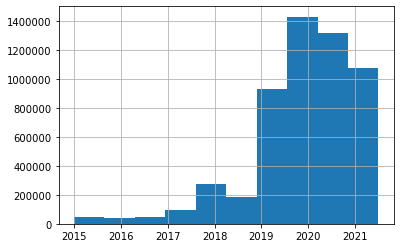

In [11]:
teenagers["time"].hist()

In [3]:
amitheasshole = pd.read_csv("AmItheAsshole_all.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
amitheasshole["time"] = pd.to_datetime(amitheasshole["created_utc"], unit='s')

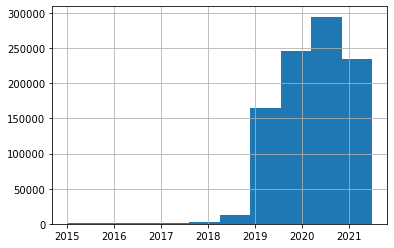

In [15]:
amitheasshole["time"].hist()

In [28]:
teenagers["link_flair_text"] = teenagers["link_flair_text"].str.lower()

In [5]:
amitheasshole["link_flair_text"] = amitheasshole["link_flair_text"].str.lower()

In [29]:
teenagers.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False).head(15)

link_flair_text
other               1272472
meme                1139455
discussion           840735
social               605854
advice               335846
rant                 325298
serious              277839
relationship         176865
media                127993
art                   86526
ama                    2302
mod                     433
verified                 74
verified ama              7
happy birthday 🎉          6
Name: link_flair_text, dtype: int64

In [6]:
common_flairs_t = teenagers["link_flair_text"].value_counts()[:10].index.tolist()
common_flairs_t

['Other',
 'Meme',
 'Discussion',
 'Social',
 'Advice',
 'Rant',
 'Serious',
 'Relationship',
 'Media',
 'Art']

In [43]:
teenagers["link_flair_text"].unique()

array(['discussion', 'other', nan, 'media', 'social', 'serious', 'rant',
       'advice', 'relationship', 'meme', 'mod', 'why.', 'not official',
       'mod post', 'mod update', 'ama', 'esskeetit',
       "reports from /r/all don't work", 'real shit',
       'real political shit', 'juul room', 'is this loss?', 'ok too far',
       'learn to crop', 'roll tide', 'mod ', 'team gibby',
       'fucking open it', "santa isn't real", 'drama alert', 'bamboozle?',
       'learn how to use word', 'real fucking shit',
       "friendzone isn't real", 'fbi open up!', 'good response',
       "hey, it's hannah baker.", 'title grammatically correct',
       "that's not introversion", '🐹 ', 'op is a big ole fakerrrr',
       'happy birthday!!', 'fucking awesome', '200 iq play',
       'happy birthday 🎂', 'kahoot ', 'verified ama',
       'frequently discussed', 'x = 16', 'instagram stories instead',
       'happy birthday 🎉', '🎉🎉 happy birthday 🎉🎉', 'big meme',
       '"latino female"', "i'm in bois ",

In [59]:
np.mean(pd.isnull(teenagers["link_flair_text"]))

0.04699264475082648

In [53]:
amitheasshole.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False).head(15)

link_flair_text
not the a-hole       222416
asshole               73314
no a-holes here       36657
everyone sucks        21130
not enough info        9595
update                 3131
meta                   1278
tl;dr                  1173
shitpost                473
no a--holes here        355
not the asshole         274
too close to call       155
troll                    24
probably fake            22
50/50                    22
Name: link_flair_text, dtype: int64

In [6]:
common_flairs_a = amitheasshole["link_flair_text"].value_counts()[:8].index.tolist()
common_flairs_a

['not the a-hole',
 'asshole',
 'no a-holes here',
 'everyone sucks',
 'not enough info',
 'update',
 'meta',
 'tl;dr']

In [60]:
np.mean(pd.isnull(amitheasshole["link_flair_text"]))

0.6136497669155541

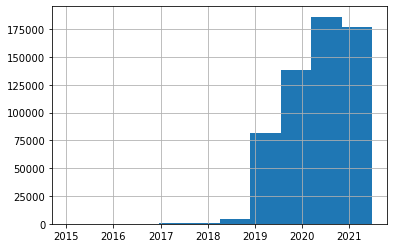

In [63]:
amitheasshole[pd.isnull(amitheasshole["link_flair_text"])]["time"].hist()

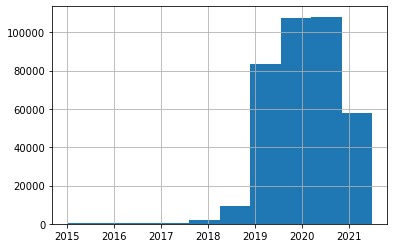

In [69]:
amitheasshole[(amitheasshole["link_flair_text"]).notnull()]["time"].hist()

In [77]:
amitheasshole[pd.isnull(amitheasshole["link_flair_text"])]["selftext"][0:3].values

array(['A few weekends ago my friend got too drunk and too riled up and tried to fight another guy at a party. The whole situation got way out of hand and he just stayed insanely pissed off and we could not calm him down and then he got in his car and drove off with another friend. I threatened to call the police because he was so mad. My reasoning was that if he had gone out and hurt someone by accident, we would all be kicking ourselves for letting him go and if this had happened with someone else and one of our friends had been hurt we would be pissed. So yeah. Am I the asshole? ',
       nan,
       "My wife lied to me about being home when she really was at her parents house.  I was working late and on my way home i called her to let her know i was coming home.  She said she was at home and i let her know i would be home soon.  When I got home, she was not there so I called her. She claimed she was at the gas station getting gas.  I called her out on that because she never makes a

In [7]:
amitheasshole = amitheasshole[amitheasshole["link_flair_text"].isin(common_flairs_a)]

In [7]:
teenagers = teenagers[teenagers["link_flair_text"].isin(common_flairs_t)]

In [91]:
teenagers["link_flair_text"].value_counts()[:8].index.tolist()

TypeError: tuple indices must be integers or slices, not str

In [95]:
amitheasshole.groupby("title")["title"].count().sort_values(ascending=False).head(15)

title
AITA                                              120
AITA?                                              51
AITA for yelling at my mom?                        45
AITA for wanting to move out?                      44
AITA for moving out?                               38
AITA for not tipping?                              37
AITA for making my mom cry?                        30
AITA for ignoring my friend?                       27
AITA for ghosting my friend?                       27
AITA for not apologizing?                          26
AITA for getting mad at my friend?                 26
AITA for being mad at my friend?                   25
AITA for not wanting to celebrate my birthday?     25
AITA for making a joke?                            25
AITA for yelling at my sister?                     24
Name: title, dtype: int64

In [9]:
teenagers.groupby("title")["title"].count().sort_values(ascending=False).head(15)

title
Help                    4230
Nice                    3271
I need help             2879
An interesting title    2665
Hi                      2193
Anyone wanna chat?      1885
Bruh                    1755
Hello                   1491
It do be like that      1389
Anyone wanna talk?      1324
Hey                     1302
Yes                     1195
Selfie thread           1173
Oof                     1146
help                    1115
Name: title, dtype: int64

In [10]:
teenagers.groupby("selftext")["selftext"].count().sort_values(ascending=False).head(15)

selftext
[deleted]                    1391738
[removed]                     494751
Change my mind                  1128
Title                            982
Help                             909
:(                               850
Who up?                          640
:)                               585
Nice                             584
That is all                      571
F                                537
Bottom text                      492
help                             481
title                            480
Your text post (optional)        428
Name: selftext, dtype: int64

In [14]:
amitheasshole.groupby("selftext")["selftext"].count().sort_values(ascending=False).head(4)

selftext
[removed]    507888
[deleted]    151481
.                59
Deleted          19
Name: selftext, dtype: int64

In [15]:
amitheasshole.groupby("selftext")["selftext"].count().sort_values(ascending=False).head(10)

selftext
[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [8]:
amitheasshole["title_wc"] = amitheasshole["title"].str.split().map(len)

In [ ]:
amitheasshole["selftext_wc"] = amitheasshole["selftext"].str.split().map(len)

In [ ]:
amitheasshole